In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, concatenate, Input, Flatten
from tensorflow.keras.models import Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
data = pd.read_csv('product.csv', delimiter=';')

# Lihat nama kolom yang ada di DataFrame
print(data.columns)

Index(['id', 'name', 'description', 'price_range', 'min_order', 'order_req',
       'supply_ability', 'history_view_product', 'user_id', 'order_click',
       'image'],
      dtype='object')


In [4]:
# Select relevant columns for recommendation system
data = data[['id', 'name', 'order_click', 'history_view_product', 'min_order']]

# Normalize data
scaler = StandardScaler()
data[['order_click', 'history_view_product', 'min_order']] = scaler.fit_transform(data[['order_click', 'history_view_product', 'min_order']])

# Convert data to numpy array
product_features = data[['order_click', 'history_view_product', 'min_order']].values

<ipython-input-4-d82ca3148113>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['order_click', 'history_view_product', 'min_order']] = scaler.fit_transform(data[['order_click', 'history_view_product', 'min_order']])


In [7]:
X_train, X_test = train_test_split(product_features, test_size=0.2, random_state=42)
# Build Simple AutoEncoder Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(product_features.shape[1],)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(product_features.shape[1])  # Output layer, tanpa aktivasi karena ini adalah masalah rekonstruksi
])

# Compile model
model.compile(optimizer=Adam(lr=0.001), loss='mse')

In [8]:
# Train the model with hyperparameter
history = model.fit(X_train, X_train, epochs=300, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/300
5/5 [==============================] - 1s 51ms/step - loss: 0.9302 - val_loss: 0.9764
Epoch 2/300
5/5 [==============================] - 0s 14ms/step - loss: 0.8142 - val_loss: 0.8706
Epoch 3/300
5/5 [==============================] - 0s 10ms/step - loss: 0.7075 - val_loss: 0.7621
Epoch 4/300
5/5 [==============================] - 0s 14ms/step - loss: 0.5993 - val_loss: 0.6480
Epoch 5/300
5/5 [==============================] - 0s 12ms/step - loss: 0.4862 - val_loss: 0.5234
Epoch 6/300
5/5 [==============================] - 0s 18ms/step - loss: 0.3751 - val_loss: 0.3929
Epoch 7/300
5/5 [==============================] - 0s 18ms/step - loss: 0.2674 - val_loss: 0.2656
Epoch 8/300
5/5 [==============================] - 0s 21ms/step - loss: 0.1741 - val_loss: 0.1565
Epoch 9/300
5/5 [==============================] - 0s 19ms/step - loss: 0.1012 - val_loss: 0.0761
Epoch 10/300
5/5 [==============================] - 0s 14ms/step - loss: 0.0488 - val_loss: 0.0315
Epoch 11/300
5/5 [=

2/2 [==============================] - 0s 10ms/step - loss: 4.5134e-04
Mean Squared Error (MSE) pada data testing: 0.0004513440653681755


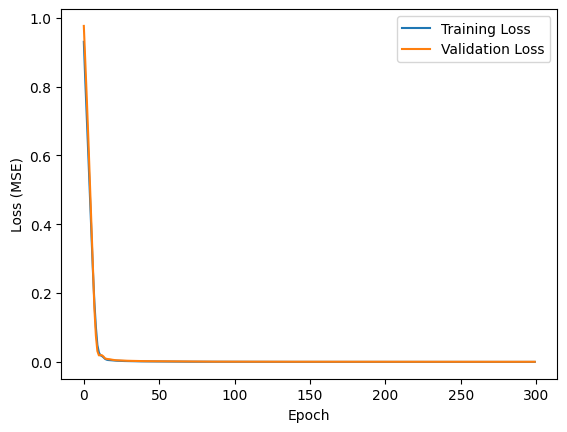

In [9]:
# MSE Count on Data Testing 
mse = model.evaluate(X_test, X_test)
print("Mean Squared Error (MSE) pada data testing:", mse)

# Visualize
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
# Get latent representation of products
product_embeddings = encoder_model.predict(product_features)

# Function to get product recommendations
def get_recommendations(product_id, embeddings, product_data, top_k=5):
    # Calculate cosine similarity with all products
    similarities = cosine_similarity([embeddings[product_id]], embeddings)[0]
    # Get indices of top_k most similar products
    similar_indices = similarities.argsort()[-top_k-1:-1][::-1]
    # Get names of recommended products
    recommended_product_names = product_data.iloc[similar_indices]['name'].tolist()
    return recommended_product_names

# Get 5 recommendations for product with ID 0
recommended_products = get_recommendations(0, product_embeddings, data, top_k=5)
print(recommended_products)

7/7 [==============================] - 0s 2ms/step
['Wood Flooring', 'Wood Furniture', 'Cacao Nacional Grade A', 'Coffee Gayo Grade 5', 'Wood Plywood']


In [13]:
autoencoder.save('Model1_CBF.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
